In [1]:
#####################################
# Principal Component Analysis(PCA) #
# 2018-08-08 Tobigs Week 04 Class   #
#####################################

rm(list=ls()) 

### 디렉토리 및 라이브러리 설정 ###
# setwd("C:/Users/lady1/Desktop/Tobigs/180718- 10주 세미나/180808 4주차 수업/PCA")
if(!require(rgl)) install.packages("rgl"); library(rgl) # scatter plot 을 3D로 표현하는 library

Loading required package: rgl


In [3]:
### 1. Random Data 형성 ###
## 3차원 데이터를 만들어보자 
## (주의) PCA 구현하는 데이터를 형성할 때에는 데이터셋의 평균을 항상 0으로 맞춰줘야 합니다!
set.seed(10) # 10기니까 10으로 난수 형성 
X <- rnorm(n=1000, mean=0, sd=100) 
Y <- rnorm(n=1000, mean=0, sd=10)
Z <- rnorm(n=1000, mean=0, sd=50)
range <- c(min(X), max(X)) # 분산이 가장 큰 축인 x축에 맞춰서 range를 변환
plot3d(X, Y, Z, xlim=range, ylim=range, zlim=range) # rgl패키지로 만든 3D Plot

In [12]:
# data의 point가 x 축을 기준으로 분포하고, y축의 샘플들이 굉장히 좁은 것을 볼 수 있습니다.
# x,z로 data 설명할 수 있어보이니 x축과 z축을 corr이 있도록 sorting을 해보겠습니다.
X <- sort(rnorm(n=1000, mean=0, sd=100))
Y <- rnorm(n=1000, mean=0, sd=10)
Z <- sort(rnorm(n=1000, mean=0, sd=50))
range <- c(min(X), max(X))
plot3d(X, Y, Z, xlim=range, ylim=range, zlim=range) 
### Random Data 형성 완료! ###

X,Y,Z
-307.6790,3.189416,-161.4083
-287.2399,9.643960,-155.6731
-285.2709,-1.506479,-142.1160
-267.1175,-6.793282,-136.9821
-246.0366,14.781523,-129.6964
-243.9406,3.893267,-129.3881


,X,Y,Z
X,10597.18596,-26.39423,4939.83815
Y,-26.39423,101.50328,-12.87054
Z,4939.83815,-12.87054,2317.17995


eigen() decomposition
$values
[1] 12902.52964   101.43874    11.90081

$vectors
            [,1]         [,2]         [,3]
[1,]  0.90617942  0.004445807  0.422870077
[2,] -0.00229362  0.999981700 -0.005598159
[3,]  0.42288723 -0.004103033 -0.906173029


-347.0772,2.483740,16.13773
-326.1451,9.005502,19.54760
-318.6022,-2.191604,8.15758
-299.9687,-7.418668,11.21154
-277.8342,14.219570,13.40313
-275.7795,3.339566,14.07098


[1] 0.8936248

[1] 0.07923548

[1] 0.02713976

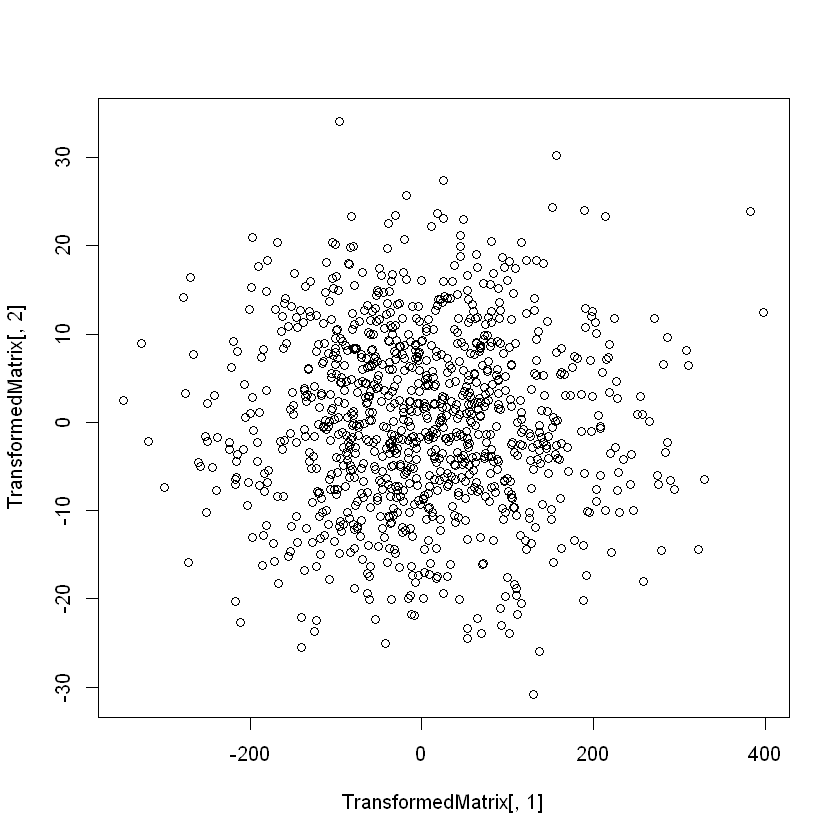

In [13]:
### 2. PCA를 간단히 구현해보자 ###
## PDF 26p의 과정과 함께 보세용!
## 2-1. Data Matrix 형성
OriginMatrix <- cbind(X, Y, Z) # 1000*3의 Matrix 형성
head(OriginMatrix)

## 2-2. Covariance Matrix 형성
CovMatrix <- cov(OriginMatrix) # cov(): Covariance Matrix를 형성해주는 함수 
CovMatrix

## 2-3. eigen value, eigen vector
lambdaA <- eigen(CovMatrix) # eigen(): Eigen Value와 Eigen Vector를 형성해주는 함수 
lambdaA # value와 vector를 확인하려면 각각 lambdaA$values, lambdaA$vectors
## Values의 component와 vectors의 열이 일대일 대응된다.

## 2-4. 새로운 data set 생성(OriginMatrix의 선형 결합)
TransformedMatrix <- OriginMatrix %*% lambdaA$vectors
head(TransformedMatrix)

## 2-5. Dataset 선형 변환여부 확인
range2 <- c(min(TransformedMatrix[,1]), max(TransformedMatrix[,1]))
plot3d(TransformedMatrix[,1], TransformedMatrix[,2], TransformedMatrix[,3], xlim=range2, ylim=range2, zlim=range2, col='red')
plot3d(X, Y, Z, xlim=range, ylim=range, zlim=range, add=T)
## 차원축소한 것이 아니므로 새로 생성된 변수 TransformedMatrix는 OriginMatrix의 선형 변환 

## 2-6. 변수의 Component Impact 확인 
sd(TransformedMatrix[,1])/(sd(TransformedMatrix[,1])+sd(TransformedMatrix[,2])+sd(TransformedMatrix[,3]))# 0.9030655
sd(TransformedMatrix[,2])/(sd(TransformedMatrix[,1])+sd(TransformedMatrix[,2])+sd(TransformedMatrix[,3]))# 0.07973736
sd(TransformedMatrix[,3])/(sd(TransformedMatrix[,1])+sd(TransformedMatrix[,2])+sd(TransformedMatrix[,3]))# 0.01719718
## 제3변수 Impact가 작으니 제거하고 ploting 
plot(TransformedMatrix[,1], TransformedMatrix[,2]) # 모든 data가 pc1 pc2 에 분포

In [14]:
### 3. 구현한 PCA와 PCA 함수를 비교해보자 ###
## SVD(Singular Value Decomposition) 이용(prcomp와 princomp)
## prcomp(x, retx = TRUE, center = TRUE, scale. = FALSE, tol = NULL, rank. = NULL, ...)
## x : data, retx : 변수축 회전 여부, center=zero:원점 설정 여부, scale : 표준화여부
## prcomp : sdev, rotation(eigenvetors), center, scale, x(principal component)
pca <- prcomp(OriginMatrix, center=T, scale=T) # center=T(데이터 중앙을 0으로), scale=T(분산을 1로)
## 해석: PC1 =  0.70636575 * X + 0.04628937 * Y + 0.70633188 * Z의 선형식을 가지는 변수
pca$sdev
pca$rotation # rotation(eigenvetors)

[1] 1.41358465 0.99932318 0.05596089

,PC1,PC2,PC3
X,0.70661774,-0.02656929,0.7070964884
Y,-0.03680141,-0.99932230,-0.0007732406
Z,0.70663783,-0.02547577,-0.7071166510


In [2]:
### 4. dataset으로 전처리 단계에서 주성분분석 ###

### 데이터 확인 ###
wine <- read.table("http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", sep=",")
colnames(wine) <- c("Cvs","Alcohol","Malic acid","Ash","Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline") # 변수명 설정 
str(wine) # 데이터 구조 확인
head(wine) # 데이터 내용 확인 
summary(wine)

'data.frame':	178 obs. of  14 variables:
 $ Cvs                         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Alcohol                     : num  14.2 13.2 13.2 14.4 13.2 ...
 $ Malic acid                  : num  1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 ...
 $ Ash                         : num  2.43 2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 ...
 $ Alcalinity of ash           : num  15.6 11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 ...
 $ Magnesium                   : int  127 100 101 113 118 112 96 121 97 98 ...
 $ Total phenols               : num  2.8 2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 ...
 $ Flavanoids                  : num  3.06 2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 ...
 $ Nonflavanoid phenols        : num  0.28 0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 ...
 $ Proanthocyanins             : num  2.29 1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 ...
 $ Color intensity             : num  5.64 4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 ...
 $ Hue                         :

Cvs,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


      Cvs           Alcohol        Malic acid         Ash       
 Min.   :1.000   Min.   :11.03   Min.   :0.740   Min.   :1.360  
 1st Qu.:1.000   1st Qu.:12.36   1st Qu.:1.603   1st Qu.:2.210  
 Median :2.000   Median :13.05   Median :1.865   Median :2.360  
 Mean   :1.938   Mean   :13.00   Mean   :2.336   Mean   :2.367  
 3rd Qu.:3.000   3rd Qu.:13.68   3rd Qu.:3.083   3rd Qu.:2.558  
 Max.   :3.000   Max.   :14.83   Max.   :5.800   Max.   :3.230  
 Alcalinity of ash   Magnesium      Total phenols     Flavanoids   
 Min.   :10.60     Min.   : 70.00   Min.   :0.980   Min.   :0.340  
 1st Qu.:17.20     1st Qu.: 88.00   1st Qu.:1.742   1st Qu.:1.205  
 Median :19.50     Median : 98.00   Median :2.355   Median :2.135  
 Mean   :19.49     Mean   : 99.74   Mean   :2.295   Mean   :2.029  
 3rd Qu.:21.50     3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.875  
 Max.   :30.00     Max.   :162.00   Max.   :3.880   Max.   :5.080  
 Nonflavanoid phenols Proanthocyanins Color intensity       Hue      

[1] 1 2 3
Levels: 1 2 3

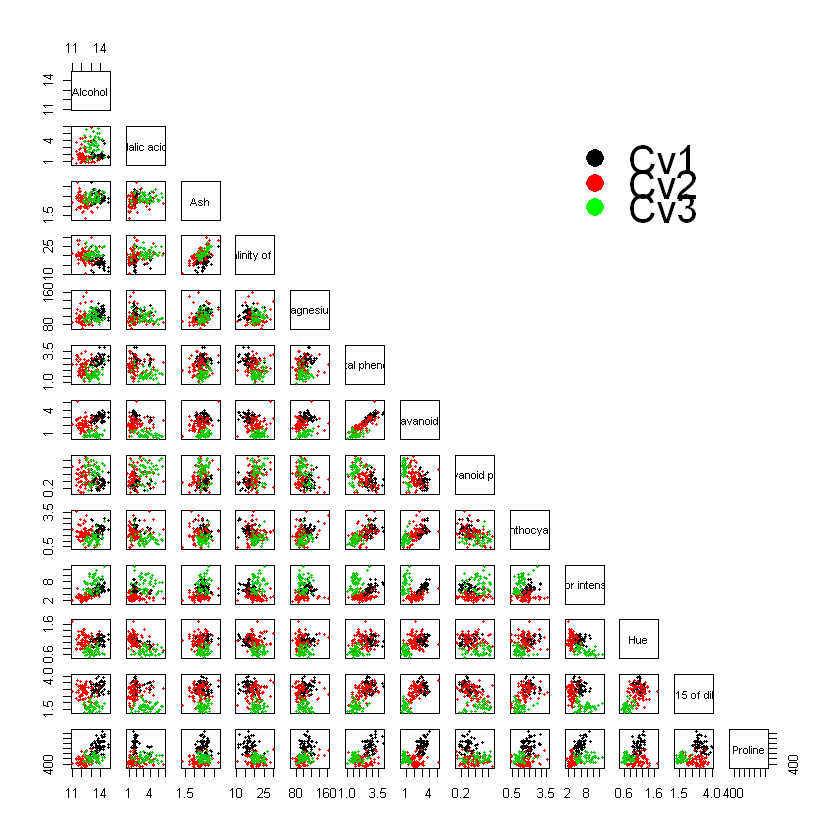

In [5]:
# 13개 변수로 이루어진 178개의 데이터
# 설명변수는 모두 연속형변수
# 종속변수 Y인 Cvs는 factor로 변환해야(Cvs: The type of wine into one of three classes)
unique(wine$Cvs) 
wine$Cvs <- factor(wine$Cvs) # 종속변수 Y인 Cvs는 factor로 변환
pairs(wine[,-1], col = wine$Cvs, upper.panel = NULL, pch = 16, cex = 0.5) # 변수 간 상관성 확인 # upper.panel = NULL은 위쪽 panel을 안보이겠다는 의미 
legend("topright", bty = "n", legend = c("Cv1","Cv2","Cv3"), pch = 16, col = c("black","red","green"),xpd = T, cex = 2, y.intersp = 0.5) # 범례 

In [6]:
## data partition
set.seed(10)
idx <- sample(1:nrow(wine), round(nrow(wine)*0.7), replace = F)
train <- wine[idx, -1] ; test <- wine[-idx, -1] 
train_label <- wine[idx, 1] ; test_label <- wine[-idx, 1]

dev.off() # plot 갱신 
winePCA <- prcomp(scale(train)) # 종속변수를 제외한 데이터 PCA 
plot(winePCA$x[,1:2], col = wine$Cvs)

null device 
          1

Importance of components:
                          PC1    PC2    PC3     PC4    PC5     PC6     PC7
Standard deviation     2.1836 1.5345 1.2270 0.99107 0.9107 0.83600 0.70106
Proportion of Variance 0.3668 0.1811 0.1158 0.07556 0.0638 0.05376 0.03781
Cumulative Proportion  0.3668 0.5479 0.6637 0.73928 0.8031 0.85683 0.89464
                          PC8     PC9    PC10   PC11    PC12    PC13
Standard deviation     0.5958 0.53997 0.49801 0.4755 0.38986 0.31146
Proportion of Variance 0.0273 0.02243 0.01908 0.0174 0.01169 0.00746
Cumulative Proportion  0.9219 0.94437 0.96345 0.9808 0.99254 1.00000

[1] 6

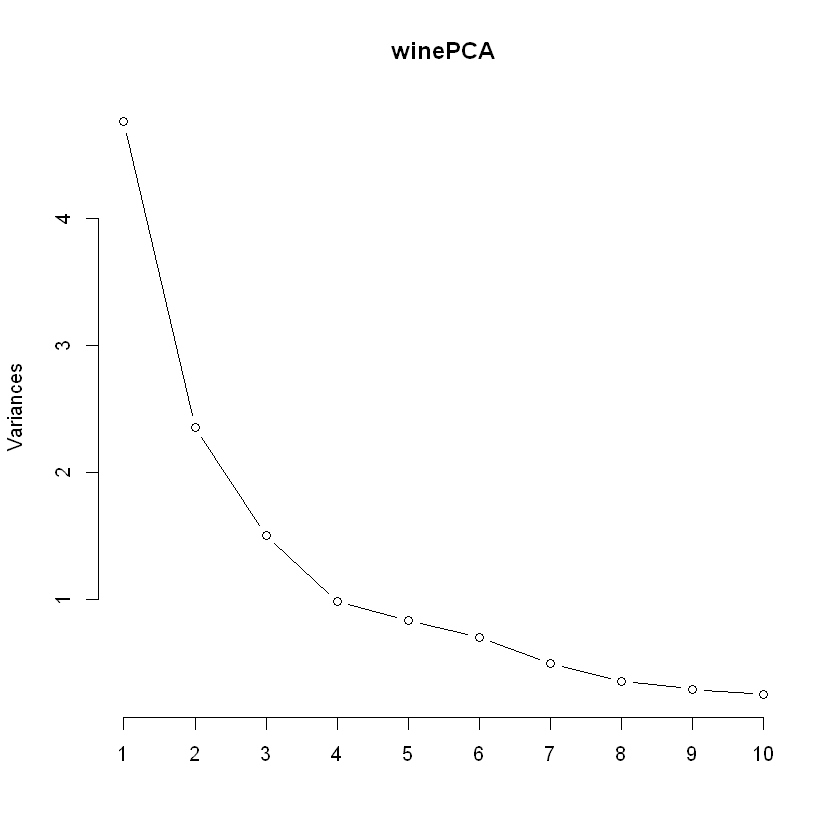

In [7]:
## 변수의 개수 결정(elbow point & Cumulative Proportion)
plot(winePCA, type="l") # 3~4번째에서 끊으면 되겠다.
summary(winePCA)# Elbow point인 PC4까지로는 74%정도까지 설명할 수 있다. 
min(which(summary(winePCA)[[6]][3,] >= 0.85)) # 누적비율을 원하는 비율까지 올려서 누적설명력이 85% 이상인 주성분의 index 뽑기
## summary(winePCA)[[6]]  =>  Importance of components 부분
## summary(winePCA)[[6]][3,]  =>  Cumulative Proportion 부분

In [8]:
## 기존 data matrix와 Eigenvetor 내적
## 행렬곱을 통해 새로운 주성분을 만드는 과정
## 새로운 주성분 PC의 성분의 구성 값 계산
## rotation이 계수값
## 주성분 구성할때의 pc1 <- a*x1 + b*x2 +... 에서 a,b
trainPRC <- as.matrix(train) %*% winePCA$rotation
testPRC <- as.matrix(test) %*% winePCA$rotation

trainF <- cbind(as.data.frame(trainPRC), train_label)
testF <- cbind(as.data.frame(testPRC), test_label)
colnames(trainF)[14] <- "label"; colnames(testF)[14] <- "label"
str(trainF)

'data.frame':	125 obs. of  14 variables:
 $ PC1  : num  163 351 150 165 501 ...
 $ PC2  : num  -191 -397 -177 -197 -558 ...
 $ PC3  : num  58.6 153.5 49.2 42.9 241.6 ...
 $ PC4  : num  113 216 115 132 275 ...
 $ PC5  : num  45.5 132.2 27.4 22.4 230.6 ...
 $ PC6  : num  -94.2 -197.4 -87.5 -93.7 -277.7 ...
 $ PC7  : num  -40.8 -78.2 -42 -47.1 -100 ...
 $ PC8  : num  1.8 10.31 6.34 4.86 9.31 ...
 $ PC9  : num  -161 -383 -135 -139 -587 ...
 $ PC10 : num  -0.145 7.022 0.039 0.856 13.954 ...
 $ PC11 : num  -345 -757 -308 -339 -1101 ...
 $ PC12 : num  -4.74 -6.69 -3.19 -3.19 -9.49 ...
 $ PC13 : num  27.7 66.3 23 22 102.1 ...
 $ label: Factor w/ 3 levels "1","2","3": 2 1 2 2 1 1 1 1 2 2 ...


In [9]:
## 만든 주성분으로 회귀분석
fit <- lm(label~., family = "binomial", data = trainF)
summary(fit)

## 예측
fit_pred <- predict(fit, type="response", newdata = testF)
test_pred<- round(fit_pred)

table <- table(test_label, test_pred)
table
sum(diag(table))/sum(table) # 96%

Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"Warning message:
"In lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...) :
 extra argument 'family' will be disregarded"Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"Warning message in Ops.factor(r, 2):
"'^' not meaningful for factors"ERROR while rich displaying an object: Error in quantile.default(resid): factors are not allowed

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         retur

          test_pred
test_label  1  2  3
         1 12  0  0
         2  0 25  1
         3  0  1 14

[1] 0.9622642